<center>
<table style="border:none">
    <tr style="border:none">
    <th style="border:none">
        <a  href='https://colab.research.google.com/github/AmirMardan/ml_course/blob/main/4_visualization/1_seaborn.ipynb'><img src='https://colab.research.google.com/assets/colab-badge.svg'></a>
    </th>
    <th style="border:none">
        <a  href='https://github1s.com/AmirMardan/ml_course/blob/main/4_visualization/1_seaborn.ipynb'><img src='../imgs/open_vscode.svg' height=20px width=115px></a>
    </th>
    </tr>
</table>
</center>


This notebook is created by <a href='https://github.com/AmirMardan'> Amir Mardan</a>. For any feedback or suggestion, please contact me via my <a href="mailto:mardan.amir.h@gmail.com">email</a>, (mardan.amir.h@gmail.com).



<center>
<img id='PYTHON' src='img/seaborn.svg' width='300px'>
</center>

<a name='top'></a>
# Seaborn

Seaborn is a very well-styled Python visualization package that is created on the top of Matplotlib. Seaborn has attracted lots of users because of its ease of use. This is also due to the fact that it integrates with Pandas data structures very well.

We can classify the functions in the seaborn into two classes of 'axes-level' and 'figure-level' functions.
Each module has a single figure-level function, which provides a unitary interface to its various axes-level function.

<center>
<img src='./img/seaborn_ax_fig.png' width=400px alt='seaborn_levels'>
</center>

So I organize this notebook based on figure-level functions through which, I explain the axis-level functions.

This notebook will cover the following topics:


- [1. Relational plots](#relplot)
- [2. Distribution plots](#distribution)
    - [`displot`](#displot)
    - [`jointplot`](#joint)
    - [`pairplot`](#pair)
- [3. Categorical plots](#catplot)
    - [Categorical scatter plots](#cat_scatter)
    - [Categorical distribution plots](#cat_dist)
    - [Categorical estimate plots](#cat_est)
- [4. Regression plots](#regression)
- [5. FacetGride](#facet)
- [6. Customization](#customization)
    - [Style and theme](#style)
    - [Colors](#palette)

In [ ]:
# Let's import the required pacckages of this notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [145]:
# Loading the available datasets 

tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
titanic = sns.load_dataset('titanic')
penguins = sns.load_dataset("penguins")


In [146]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [147]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [148]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [149]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<a name='relplot'></a>
## 1. Relational plot


This function is a figure-level interface and provides access to several axes-level functions to show the relationship between two variables. The `kind` parameter selects the axes-level function.

`scatterplot()` &#8594; `kind='scatter'`

`lineplot()` &#8594; `kind='line'`

**Syntax**

```Python
seaborn.relplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, units=None, **kwargs)
```

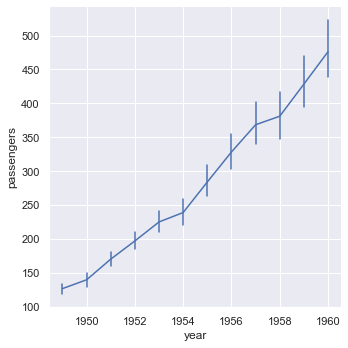

In [150]:
# Line plot
ax = sns.relplot(data=flights,  
                  x='year',  
                  y='passengers', 
                  err_style='bars',
                  kind='line'
                  )

As this plot is figure-level, we can make subplots by setting `col` and `row`.

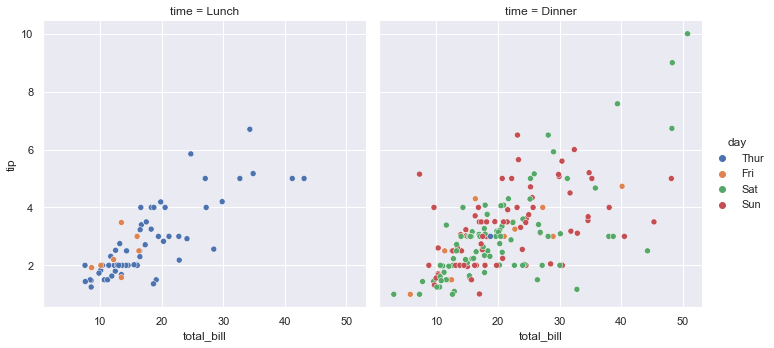

In [151]:
# Scatter plot 

sns.relplot(data=tips,  
                  x='total_bill',  
                  y='tip', 
                  col='time',  # Make column based on time
                  hue='day',
                  kind='scatter'
                  )


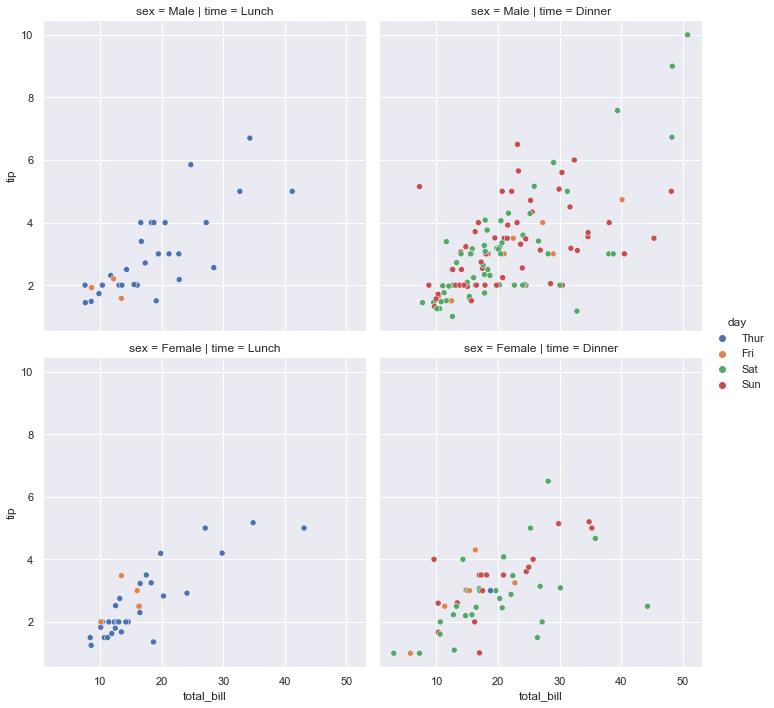

In [152]:
sns.relplot(data=tips,  
                  x='total_bill',  
                  y='tip', 
                  col='time',  # Make column based on time
                  row='sex',  # Make row based on gender
                  hue='day',
                  kind='scatter'
                  )

`relplot` underly on `lineplot()` and `scatterplot()`. So, their argument can be given to `relplot` as well. So to see how axes-level functions work in seaborn, let's try these two functions.

### Line plot

Line plots are used to assess the changes of two variables with respect to each other. `lineplot` in seaborn gives us the ability to show the relationship of `x` and `y` for different subsets of data using `hue`, `size`, and `style`.

**Syntax**

```Python
seaborn.lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)
```

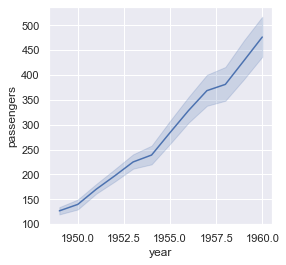

In [153]:
fig = plt.figure(figsize=(4, 4))  # Create a figure

ax = sns.lineplot(data=flights,  # Dataframe
                  x='year',  # name of the feature for x-axis
                  y='passengers',   # name of the feature for y-axis
                  )

As is shown we plot the number of passengers in each year. However having a fast look at the dataframe can bring up a question. There are multiple observations for each year and seaborn shows the mean of them as we set `estimator='mean'`. 
For a better comparison, this data is plotted with matplotlib in the next cell.

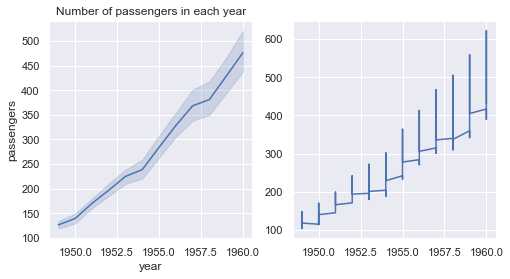

In [154]:
fig = plt.figure(figsize=(8, 4))  # Create a figure

ax = fig.add_subplot(121)
ax = sns.lineplot(data=flights,  # Dataframe
                  x='year',  # name of the feature for x-axis
                  y='passengers',   # name of the feature for y-axis
                  estimator='mean',
                  )

ax.set_title('Number of passengers in each year')

ax = fig.add_subplot(122)
im = ax.plot(flights['year'], flights.passengers)


If you need to plot all observations, the `estimator` should be set on `None`

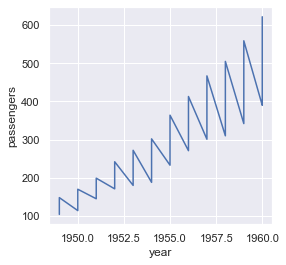

In [155]:
fig = plt.figure(figsize=(4, 4))  # Create a figure

ax = fig.add_subplot(111)
ax = sns.lineplot(data=flights,  # Dataframe
                  x='year',  # name of the feature for x-axis
                  y='passengers',   # name of the feature for y-axis
                  estimator=None,
                  )

We can also different functions if required, for example, `min`, `max`, `percentile` in here.

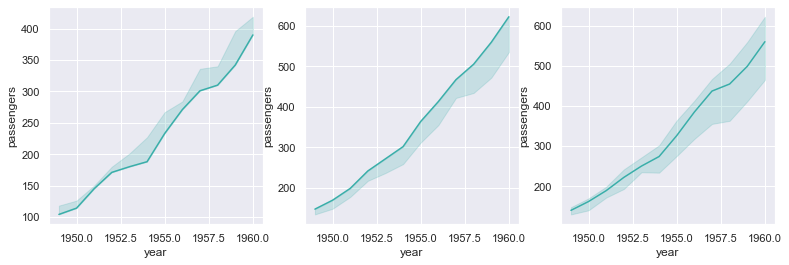

In [156]:
fig = plt.figure(figsize=(13, 4))  # Create a figure

ax = fig.add_subplot(131)
ax = sns.lineplot(data=flights, 
                  x='year',  
                  y='passengers',   
                  estimator=min, # plot the minimumm
                  color='#39AEA9'  # Set a new color
                  )

ax = fig.add_subplot(132)
ax = sns.lineplot(data=flights,  
                  x='year',  
                  y='passengers',   
                  estimator=max,  # plot the maximum
                  color='#39AEA9'
                  )


ax = fig.add_subplot(133)
ax = sns.lineplot(data=flights,  
                  x='year',  
                  y='passengers',   
                  estimator= lambda x: np.percentile(x, 85),  # plot the percentile
                  color='#39AEA9'
                  )

The cConfidence interval can be set on `'sd'` for standard deviation. To deactivate it, this parameter can be set as `None`. Using an integer value shows the percentile of data at that value, so it has to be between 0 and 100.


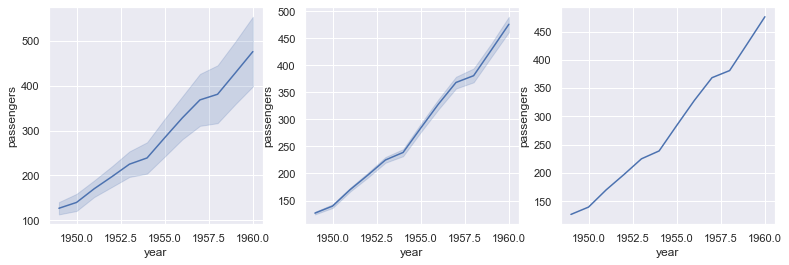

In [157]:
fig = plt.figure(figsize=(13, 4))  # Create a figure

ax = fig.add_subplot(131)
ax = sns.lineplot(data=flights, 
                  x='year',  
                  y='passengers',   
                  ci='sd'
                  )

ax = fig.add_subplot(132)
ax = sns.lineplot(data=flights,  
                  x='year',  
                  y='passengers',   
                  ci=50
                  )


ax = fig.add_subplot(133)
ax = sns.lineplot(data=flights,  
                  x='year',  
                  y='passengers',   
                  ci = None
                  )



By defining `hue`, `size`, `style`, we can consider another subset of data into account. These should be considered based on the data but here I show the use of all.

Text(0.5, 1.0, 'hue and style')

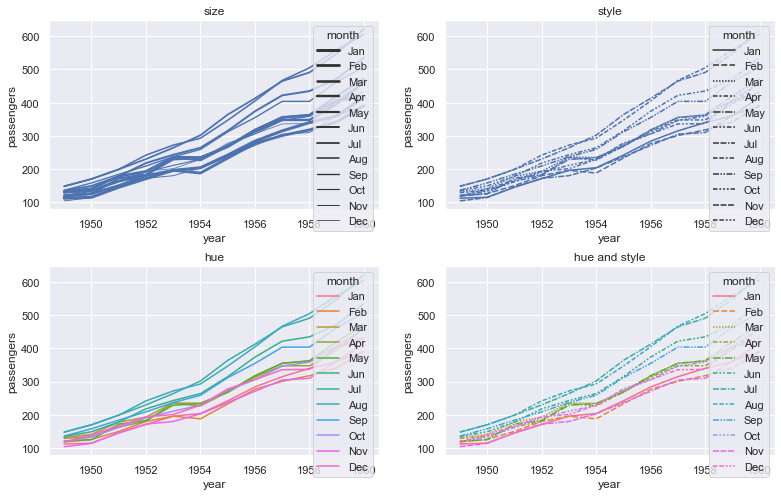

In [158]:
# Plot the dataframe and separate them based on the month of year

fig = plt.figure(figsize=(13, 8))  # Create a figure

ax = fig.add_subplot(221)
ax = sns.lineplot(data=flights, 
                  x='year',  
                  y='passengers',   
                  size='month'  # Set the line width based on the month
                  )
ax.set_title('size')

ax = fig.add_subplot(222)
ax = sns.lineplot(data=flights,  
                  x='year',  
                  y='passengers',   
                  style='month'  # Set the line style based on the month
                  )
ax.set_title('style')

ax = fig.add_subplot(223)
ax = sns.lineplot(data=flights,  
                  x='year',  
                  y='passengers',   
                  hue='month', # Set the line color based on the month
                  )
ax.set_title('hue')

# Let's plot with combination of color and style
ax = fig.add_subplot(224)
ax = sns.lineplot(data=flights,  
                  x='year',  
                  y='passengers',   
                  hue='month', # Set the line color based on the month
                  style='month', # Set the line style based on the month
                  )

plt.subplots_adjust(hspace=.3)
ax.set_title('hue and style')

To give the plot a marker, it has to have `style`. If you desire to have all lines, solid, then you need to set `dash=False`.

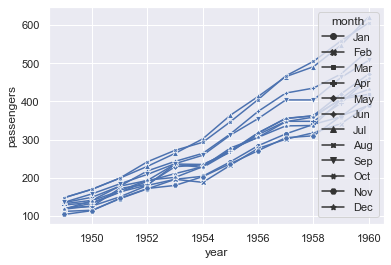

In [159]:
ax = sns.lineplot(data=flights,  
                  x='year',  
                  y='passengers', 
                  style= 'month',
                  dashes=False,
                  markers=True
                  )

Show error `bars` instead of error `bands`.

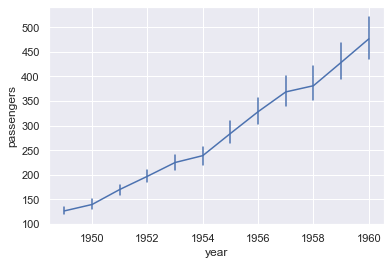

In [160]:

ax = sns.lineplot(data=flights,  
                  x='year',  
                  y='passengers', 
                  err_style='bars',
                  )

### Scatter plot

Scatter plots are another type of plotting for understanding the relationship between features.

**Syntax**

```Python
seaborn.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)
```

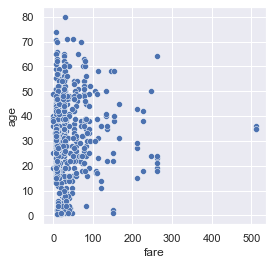

In [161]:
fig = plt.figure(figsize=(4, 4))  # Create a figure

ax = sns.scatterplot(data=titanic,  # Dataframe
                  x='fare',  # name of the feature for x-axis
                  y='age',   # name of the feature for y-axis
                  )

Like `lineplot`, by defining `hue`, `size`, `style`, we can consider another subset of data into account. 

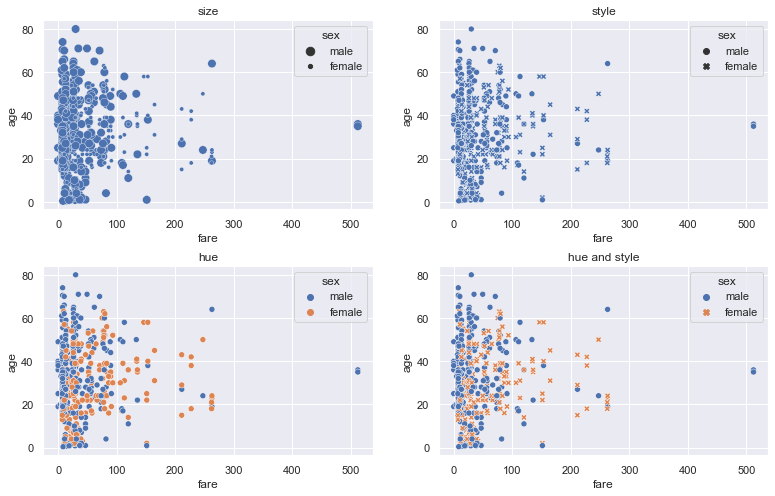

In [162]:
# Plot the dataframe and separate them based on the month of year

fig = plt.figure(figsize=(13, 8))  # Create a figure

ax = fig.add_subplot(221)
ax = sns.scatterplot(data=titanic, 
                  x='fare',  
                  y='age',   
                  size='sex'  # Set the size based on the sex
                  )
ax.set_title('size')

ax = fig.add_subplot(222)
ax = sns.scatterplot(data=titanic,  
                  x='fare',  
                  y='age',   
                  style='sex'  # Set the style based on the sex
                  )
ax.set_title('style')

ax = fig.add_subplot(223)
ax = sns.scatterplot(data=titanic,  
                  x='fare',  
                  y='age',   
                  hue='sex', # Set the color based on the sex
                  )
ax.set_title('hue')

# Let's plot with combination of color and style
ax = fig.add_subplot(224)
ax = sns.scatterplot(data=titanic,  
                  x='fare',  
                  y='age',   
                  hue='sex', # Set the color based on the sex
                  style='sex', # Set the style based on the sex
                  )
plt.subplots_adjust(hspace=.3)
ax.set_title('hue and style');

Using different features can give us more information about the problem.


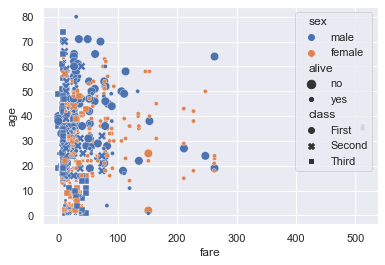

In [163]:
ax = sns.scatterplot(data=titanic,  
                  x='fare',  
                  y='age',   
                  hue='sex', # Set the color based on the month
                  size='alive', # Set the size based on the passangers situation
                  style='class' # Set the style based on the class
                  )


<a name='distribution'></a>
## 2. Distribution plots

The distribution module contains several functions for analyzing the distribution,
- axes-lavel functions
    - `histplot()`
    - `kdeplot()`
    - `ecdfplot()`
    - `rugplot()`
- figure-level functions
    - `displot()`
    - `jointplot()`
    - `pairplot()`

<a name='displot'></a>
### 2.1 `displot` 

`distplot` is a figure-level function that uses the same underlying code as `histplot`.
The `kind` parameter selects the axes-level function.

```histplot()``` &#8594; ```kind='hist'```

`kdeplot()` &#8594; `kind='kde'`

`ecdfplot()` &#8594; `kind='ecdf'`

**Syntax**

```Python
seaborn.displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
```

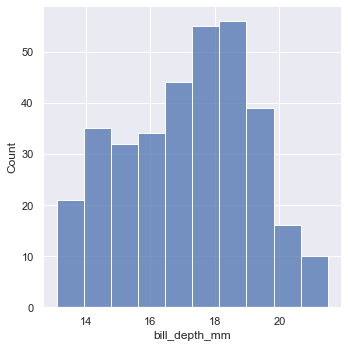

In [164]:
# Default kind is hist
sns.displot(penguins, x="bill_depth_mm")

`kind = 'kde'`


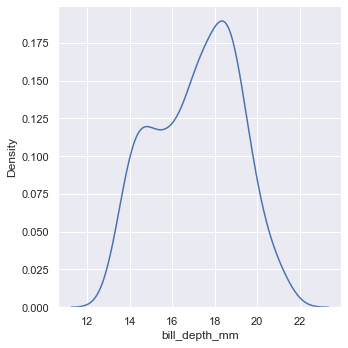

In [165]:
sns.displot(penguins, x="bill_depth_mm",
            kind='kde'
            )

`kind = 'ecdf'`


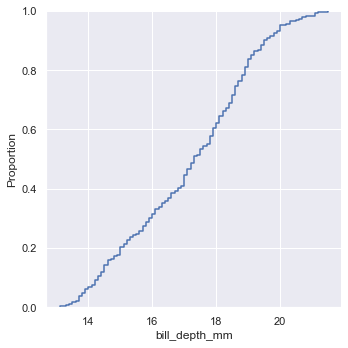

In [166]:
sns.displot(penguins, x="bill_depth_mm",
            kind='ecdf'
            )

In histogram mode, we can have the KDE (kernel density estimation) curve

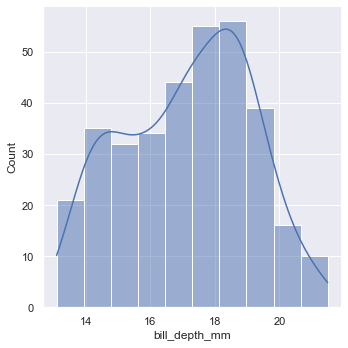

In [167]:
sns.displot(penguins, x="bill_depth_mm",
            kind='hist',  # Plot histogram
            kde=True  # Plot the kde
            )

We can have bivariate plot by assigning both `x` and `y`

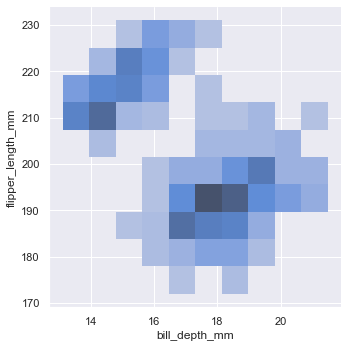

In [168]:
sns.displot(penguins,
            x='bill_depth_mm',  # Feature for x-axis
            y = 'flipper_length_mm',  # Feature for y-axis
            kind='hist',  # Plot histogram
            )

If we need to have a subplot with different kinds of plots, we should use axes-level functions.

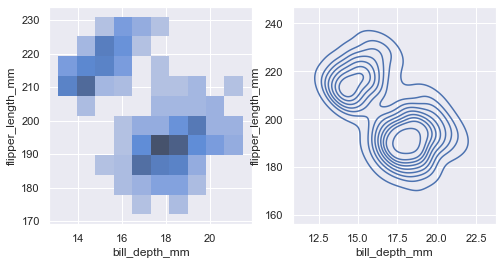

In [169]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1, 2, 1)
ax = sns.histplot(data=penguins,
            x='bill_depth_mm',  # Feature for x-axis
            y = 'flipper_length_mm',  # Feature for y-axis
            )

ax = fig.add_subplot(1, 2, 2)
ax = sns.kdeplot(data=penguins,
            x='bill_depth_mm',  # Feature for x-axis
            y = 'flipper_length_mm',  # Feature for y-axis
            )

Plot conditional distributions with `hue`

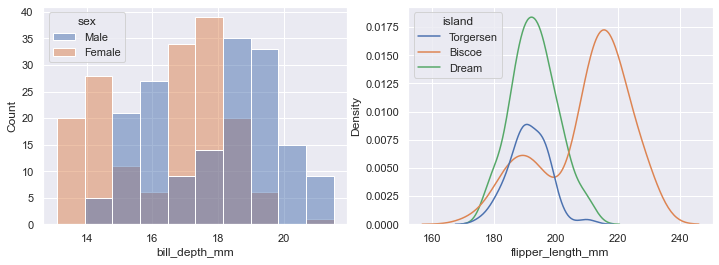

In [170]:
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 2, 1)
ax = sns.histplot(data=penguins,
            x='bill_depth_mm',  # Feature for x-axis
            hue='sex',  # separate the plots based on sex 
            )

ax = fig.add_subplot(1, 2, 2)
ax = sns.kdeplot(data=penguins,
            x = 'flipper_length_mm',  # Feature for y-axis
            hue='island',  # separate the plots based on island 
            )



We can set `multiple` for different types of plots.



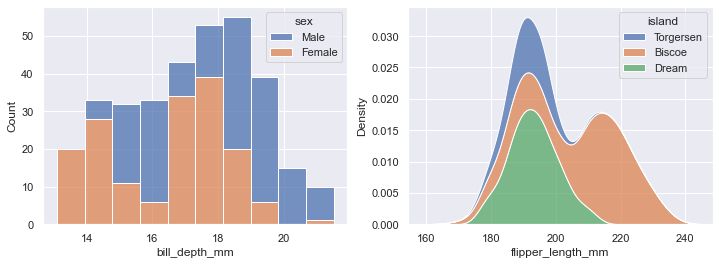

In [171]:
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 2, 1)
ax = sns.histplot(data=penguins,
            x='bill_depth_mm',  # Feature for x-axis
            hue='sex',
            multiple='stack'
            )

ax = fig.add_subplot(1, 2, 2)
ax = sns.kdeplot(data=penguins,
            x = 'flipper_length_mm',  # Feature for y-axis
            hue='island',
            multiple='stack'
            )

Estimate the cumulative distribution function

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

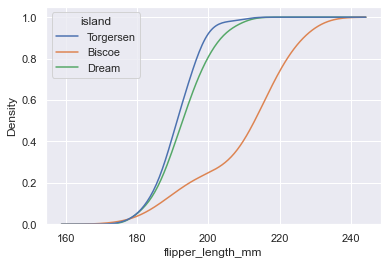

In [172]:
sns.kdeplot(data=penguins,
            x = 'flipper_length_mm',
            hue='island',
            cumulative=True, # Cumulative plot
            common_norm=False, #Scale each conditional density independetly
            common_grid=True,  # Use same evaluation grid for each density kernel
)

<a name='joint'></a>
### 2.2 `jointplot` 

Draw a plot of two variables

**Syntax**
```Python
seaborn.jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
```

This figure-level function can get 6 different kinds

`scatterplot()` &#8594; `kind='scatter'` (Default)

`kdeplot()` &#8594; `kind='kde'`

`histplot()` &#8594; `kind='hist'`

`matplotlib.axes.Axes.hexbin()` &#8594; `kind='hex'`

`regplot()` &#8594; `kind='reg'`

`residplot()` &#8594; `kind='resid'`



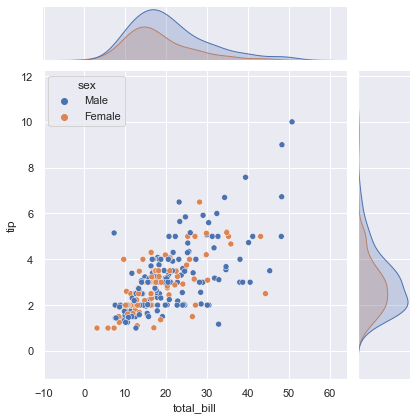

In [173]:
sns.jointplot(data=tips,
              x='total_bill',  
              y='tip',
              hue='sex')

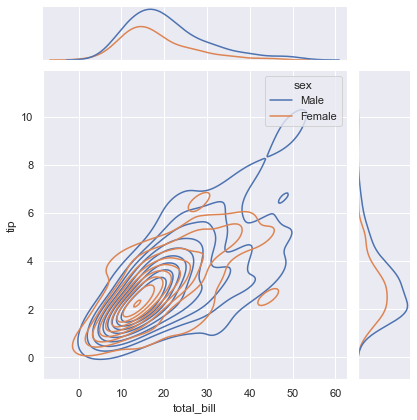

In [174]:
sns.jointplot(data=tips,
              x='total_bill',  
              y='tip',
              kind='kde',
              hue='sex'
              )

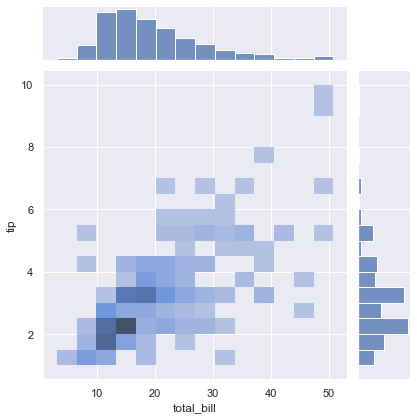

In [175]:
sns.jointplot(data=tips,
              x='total_bill',  
              y='tip',
              kind='hist'
              )

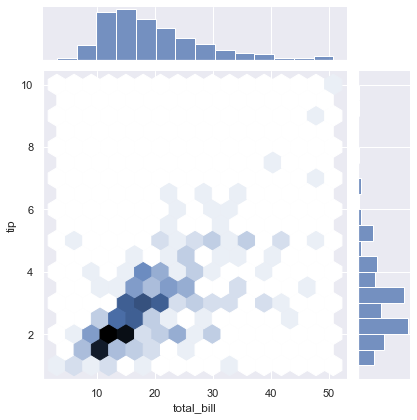

In [176]:
sns.jointplot(data=tips,
              x='total_bill',  
              y='tip',
              kind='hex'
              )

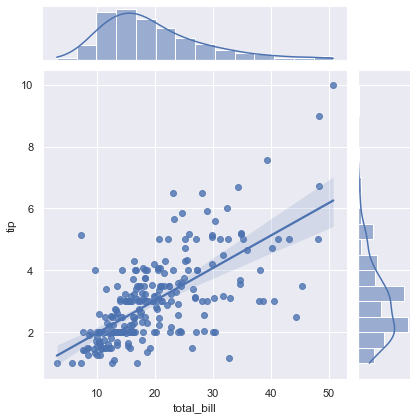

In [177]:
sns.jointplot(data=tips,
              x='total_bill',  
              y='tip',
              kind='reg',
              )

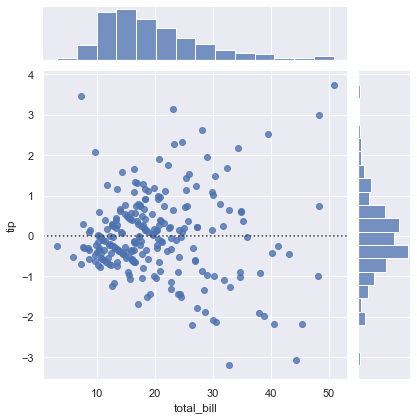

In [178]:
sns.jointplot(data=tips,
              x='total_bill',  
              y='tip',
              kind='resid'
              )

<a name='pair'></a>
### 2.3 `pairplot` 

`pairplot` shows the relationship between data in a dataset pairwise.

**Syntax**
```Python
seaborn.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
```

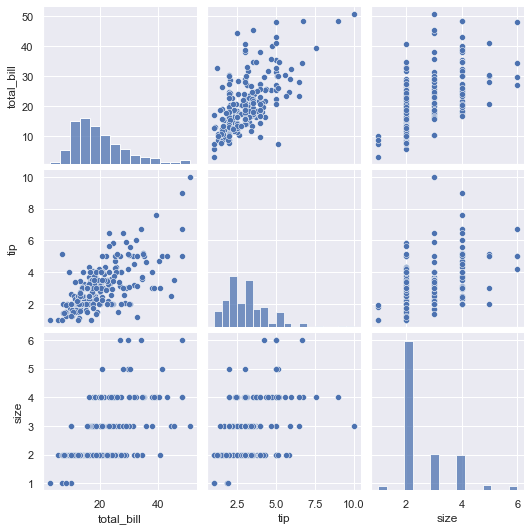

In [179]:
sns.pairplot(tips)

<a name='catplot'></a>
## 3. Categorical plots

Categorical plots are used to explore the categorical data. There are different functions available in Seaborn to help with this goal while the figure-level function for categorical plots is `catplot()`.
So, we can either use the axes-level functions or figure-level with specifying `kind`,

1. Cattegorical scatterplots
    - `stripplot()` &#8594; `kind='strip'`
    - `swarmplot()` &#8594; `kind='swarm'`
2. Categorical distribution plots
    - `boxplot()` &#8594; `kind='box'`
    - `violinplot()` &#8594; `kind='violin'`
    - `boxenplot()` &#8594; `kind='boxen'`
3. Categorical estimate plots
    - `pointplot()` &#8594; `kind='point'`
    - `barplot()` &#8594; `kind='bar'`
    - `countplot()` &#8594; `kind='count'`

**Syntax**

```Python
seaborn.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7ff320f315e0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
```
    

<a name='cat_scatter'></a>
### 3.1 Categorical scatterplots

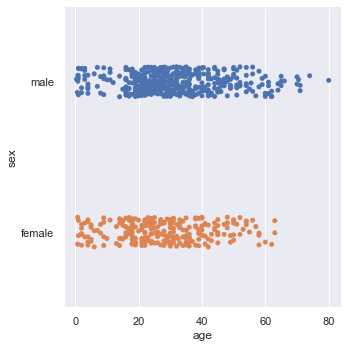

In [180]:
g = sns.catplot(x="age", y="sex", kind='strip', data=titanic)

### Stripplot

Draw a `scatterplot` where one variable is categorical.

Text(0.5, 1.0, 'Using scatterplot')

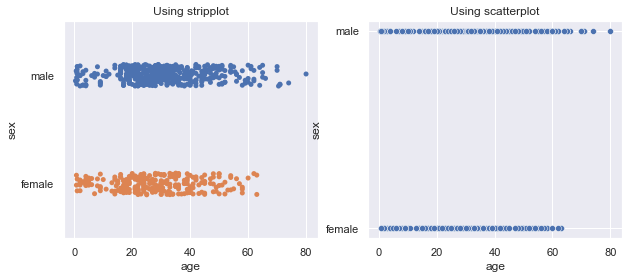

In [181]:
fig = plt.figure(figsize=(10, 4))

ax  = fig.add_subplot(121)
ax = sns.stripplot(data=titanic,
                   x='age',
                   y='sex',
                   ax=ax
                   )
ax.set_title('Using stripplot')

ax  = fig.add_subplot(122)
ax = sns.scatterplot(data=titanic,
                   x='age',
                   y='sex',
                   ax=ax
                   )
ax.set_title('Using scatterplot')

If you have many points and you want to see the distribution easier, you can set `jiter`. 

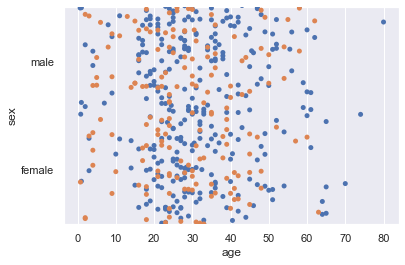

In [182]:

ax = sns.stripplot(data=titanic,
                   x='age',
                   y='sex',
                   jitter=1.5
                   )

If you set the `hue`, you can set `dodge` as `True` for more separation.

Text(0.5, 1.0, 'Using dodge')

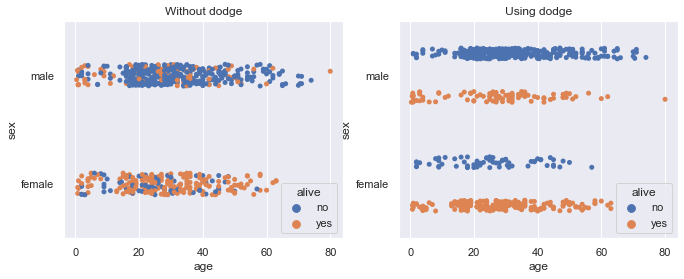

In [183]:
fig = plt.figure(figsize=(11, 4))

ax  = fig.add_subplot(121)
ax = sns.stripplot(data=titanic,
                   x='age',
                   y='sex',
                   hue='alive',
                   )
ax.set_title('Without dodge')

ax  = fig.add_subplot(122)
ax = sns.stripplot(data=titanic,
                   x='age',
                   y='sex',
                   hue='alive',
                   dodge=True
                   )
ax.set_title('Using dodge')

### Swarmplot

Draw a categorical scatterplot with non-overlapping points.

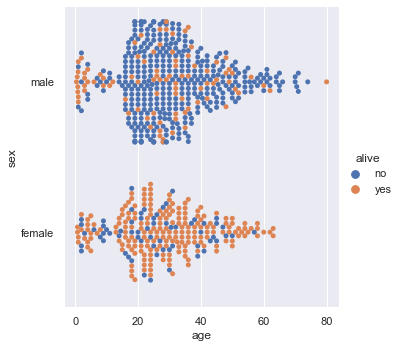

In [184]:

g = sns.catplot(data=titanic,
                x='age',
                y='sex',
                hue='alive',
                kind='swarm' # Set the kind as swarmp
                )



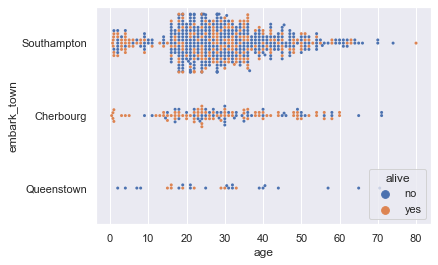

In [185]:
g = sns.swarmplot(data=titanic,
                x='age',
                y='embark_town',
                hue='alive',
                size=3
                )

<a name='cat_dist'></a>
### 4.2 Categorical distribution plots

Categorical distribution plots include
- `boxplot()`
- `violinplot()`
- `boxenplot()`

### Boxeplot

Draw a box plot to show distributions with respect to categories.




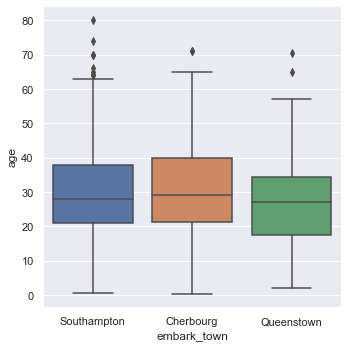

In [186]:
sns.catplot(data=titanic,
        y='age',
        x='embark_town',
        kind='box')

We can separate more subcategories by setting `hue`.

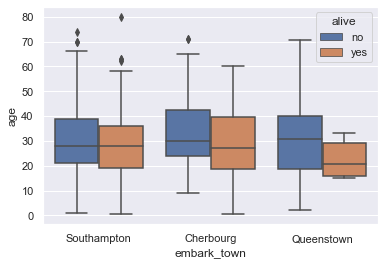

In [187]:
g = sns.boxplot(data=titanic,
                y='age',
                x='embark_town',
                hue='alive'
                
                )

### Boxenplot

Draw an enhanced box plot for larger datasets.

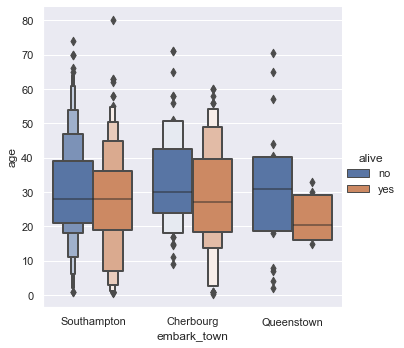

In [188]:
g = sns.catplot(data=titanic,
                y='age',
                x='embark_town',
                hue='alive',
                linewidth=2,
                kind='boxen'
                )



Please note that we can put a couple of ax-level plots on each other.

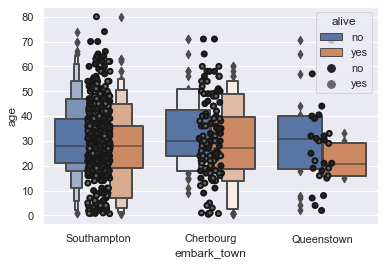

In [189]:
g = sns.boxenplot(data=titanic,
                y='age',
                x='embark_town',
                hue='alive',
                linewidth=2,
                )

g = sns.stripplot(data=titanic,
                y='age',
                x='embark_town',
                hue='alive',
                linewidth=2,
                color='.4'
                )

### Violinplot

Draw a combination of boxplot and kernel density estimate.

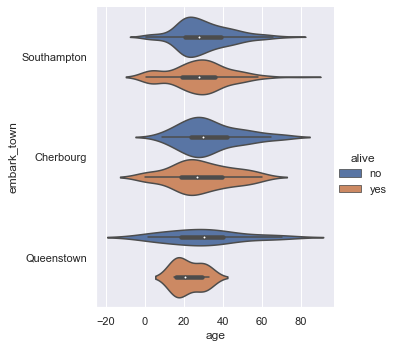

In [190]:
sns.catplot(data=titanic,
        x='age',
        y='embark_town',
        hue='alive',
        kind='violin',
)

<a name='cat_est'></a>
### 4.3 Categorical estimate plots

Categorical estimate plots include
- `pointplot()` &#8594; `kind='point'`
- `barplot()` &#8594; `kind='bar'`
- `countplot()` &#8594; `kind='count'`

### Pointplot
Show point estimates and confidence intervals using scatter plot glyphs.

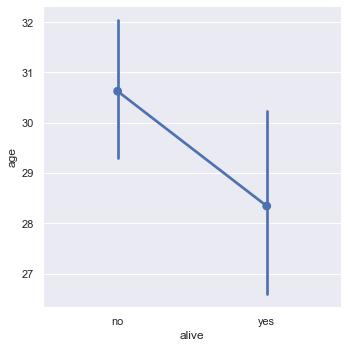

In [191]:
g = sns.catplot(data=titanic,
            x='alive',
            y='age',
            kind='point'
            )

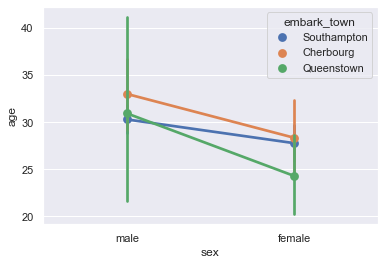

In [192]:
g = sns.pointplot(data=titanic,
            x='sex',
            y='age',
            hue='embark_town'
            )

Separate the points for different hue levels using `dodge`

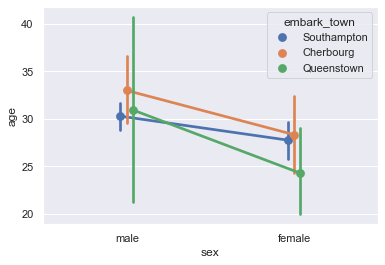

In [193]:
g = sns.pointplot(data=titanic,
            x='sex',
            y='age',
            hue='embark_town',
            dodge=True
            )

Using different line styles

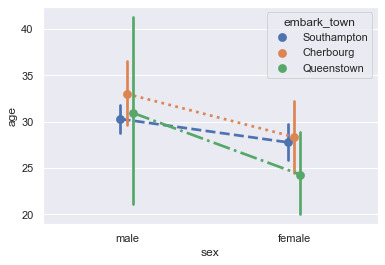

In [194]:
g = sns.pointplot(data=titanic,
            x='sex',
            y='age',
            hue='embark_town',
            dodge=True,
            linestyles=['--', ':', '-.']
            )

We can stop shoing the join

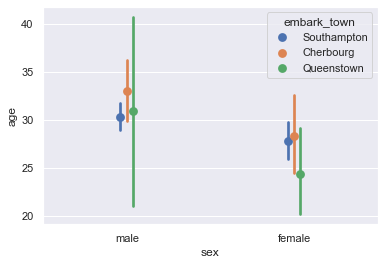

In [195]:
g = sns.pointplot(data=titanic,
            x='sex',
            y='age',
            hue='embark_town',
            dodge=True,
            join=False
            )

### Barplot

Show point estimates and confidence intervals as rectangular bars

<AxesSubplot:xlabel='embark_town', ylabel='age'>

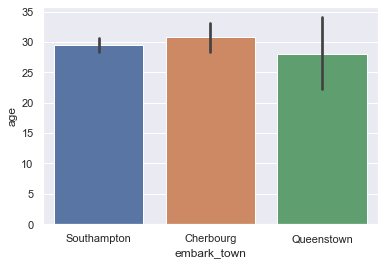

In [196]:
sns.barplot(data=titanic,
            y='age',
            x='embark_town')

Using `dodge` and `hue` for subcategories.

Text(0.5, 1.0, 'dodge False')

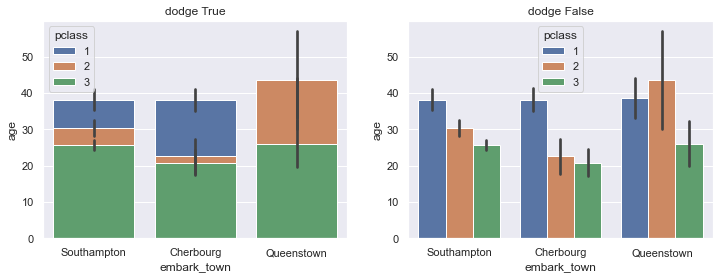

In [197]:
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(121)
ax = sns.barplot(data=titanic,
            y='age',
            x='embark_town',
            hue='pclass',
            dodge=False
            )
ax.set_title('dodge True')

ax = fig.add_subplot(122)
ax = sns.barplot(data=titanic,
            y='age',
            x='embark_town',
            hue='pclass',
            dodge=True
            )
ax.set_title('dodge False')


### Countplot

Show the counts of observations in each categorical bin using bars.

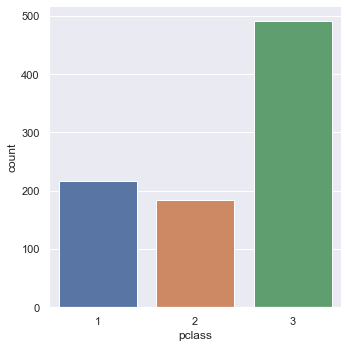

In [198]:
g = sns.catplot(data=titanic,
                x='pclass',
                kind='count')

Using `hue` for more categories.

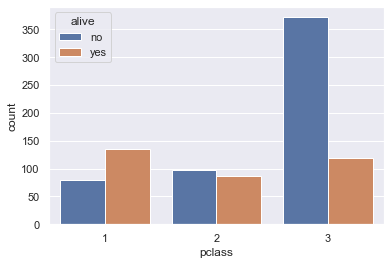

In [199]:
ax = sns.countplot(data=titanic,
                x='pclass',
                hue='alive',
                )

<a name='regression'></a>
## 4. Regression plots

As a visualization package, Seaborn provides aregression plot!! You can plot the linear relationship between two variables using `regplot()`.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

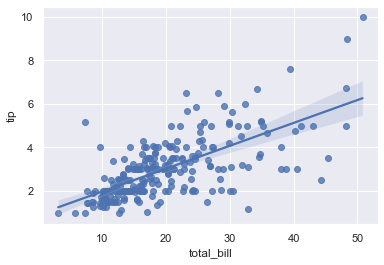

In [200]:
sns.regplot(data=tips,
            x='total_bill',
            y='tip')

This plot can be used with discrete `x` variable

<AxesSubplot:xlabel='size', ylabel='tip'>

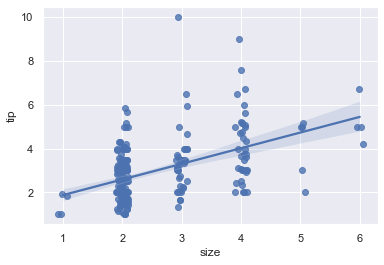

In [201]:
sns.regplot(data=tips,
            x='size',
            y='tip',
            x_jitter=.1)

In this case, we can use aggregate the discrete variable

<AxesSubplot:xlabel='size', ylabel='tip'>

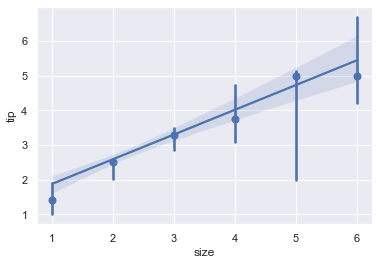

In [202]:
sns.regplot(data=tips,
            x='size',
            y='tip',
            x_estimator=np.median
            )

For a higher-order polynomial, we use `order`.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

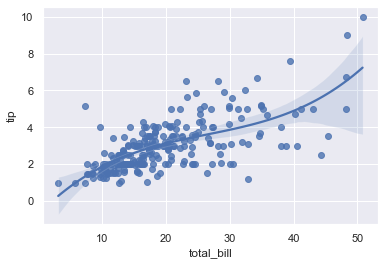

In [203]:
sns.regplot(data=tips,
            x='total_bill',
            y='tip',
            order=3)

The figure-level function for `regplot` is `lmplot`.

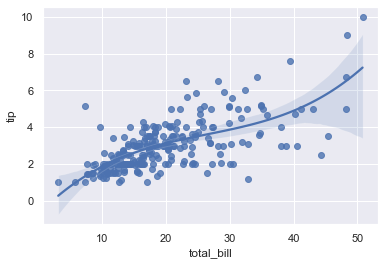

In [204]:
g = sns.regplot(data=tips,
            x='total_bill',
            y='tip',
            order=3)

By `lmplot`, we can use `hue` to separate data into different categories.

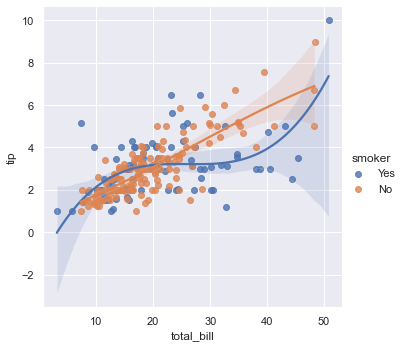

In [205]:
g = sns.lmplot(data=tips,
            x='total_bill',
            y='tip',
            hue='smoker',
            order=3
            )

It's possible to set different markers for each category.

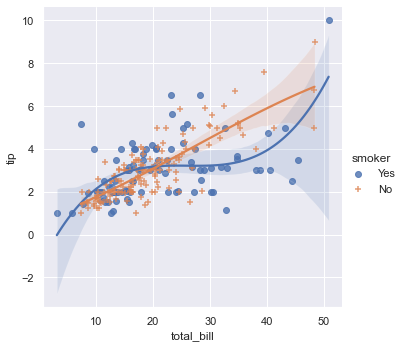

In [206]:
g = sns.lmplot(data=tips,
            x='total_bill',
            y='tip',
            hue='smoker',
            order=3,
            markers=['o', '+']
            )

We can use `col` to separate the data on different columns.

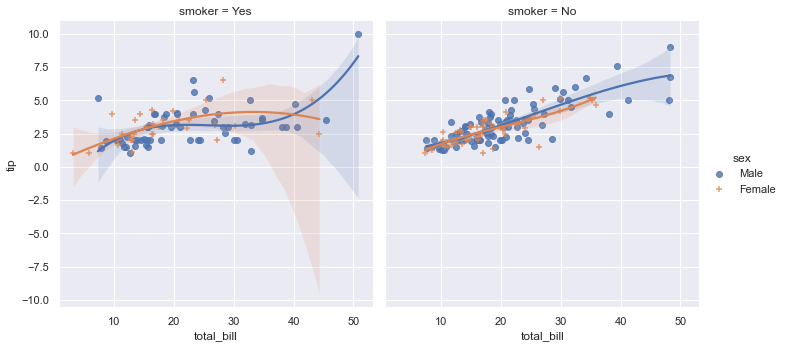

In [207]:
g = sns.lmplot(data=tips,
            x='total_bill',
            y='tip',
            hue='sex',
            col='smoker',
            order=3,
            markers=['o', '+']
            )

<a name='facet'></a>
## 5. FacetGride

FacetGrid is a class in Seaborn that maps a dataset onto multiple axes in a grid of rows and columns.

`FacetGrid()` creates the grids and we need to map the data to the desired plot.

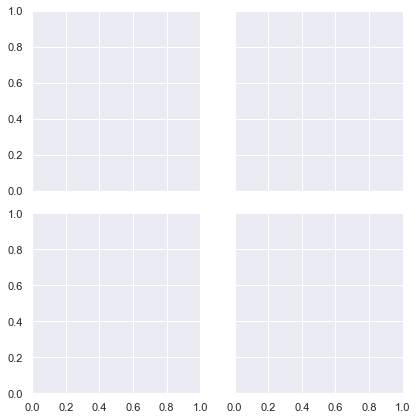

In [208]:
# Create grids
g = sns.FacetGrid(tips,  # Data
                  col='time',  # column based on time 
                  row='smoker' # row based on smoker
                  )

We can map data by  using `map` method and `map_dataframe`.

<div class="alert alert-block alert-danger">
<b>Danger:</b> For <code>map</code>, you can give the value of arguments but for <code>map_dataframe</code> you should give the variables by their name.
</div>

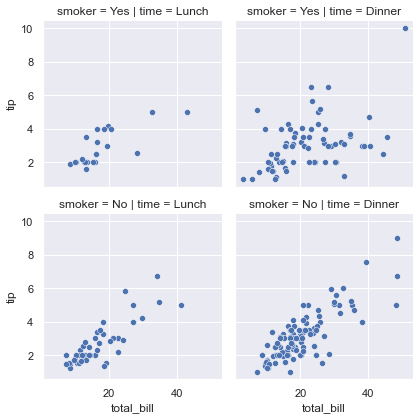

In [209]:
# Create grids
g = sns.FacetGrid(tips,
                  col='time',
                  row='smoker'
                  )

# Map data
g.map(sns.scatterplot,
      'total_bill', # x-axis
      'tip' # y-axis
      )

We can set `hue`, however we should call `add_legend()` to add the legend of the figure.



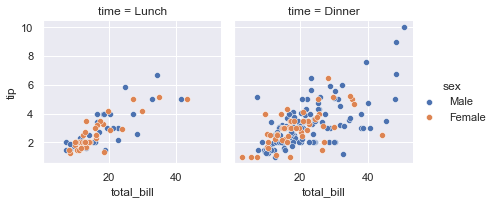

In [210]:
g = sns.FacetGrid(tips,
                  col="time",
                  hue="sex")

g.map_dataframe(sns.scatterplot,
                x="total_bill",
                y="tip")
g.add_legend()

If a variable has many levels, we can wrap the column.

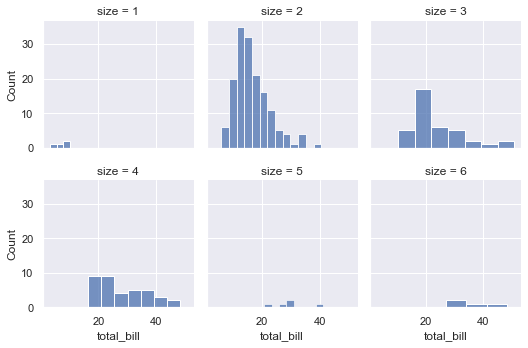

In [211]:
g = sns.FacetGrid(tips,         # Data
                  col="size",   # column based on size
                  height=2.5,   # height of plots
                  col_wrap=3    # Wrap the columns
                  )
g.map(sns.histplot, "total_bill")

We can add a reference line using `FacetGrid.refline()`

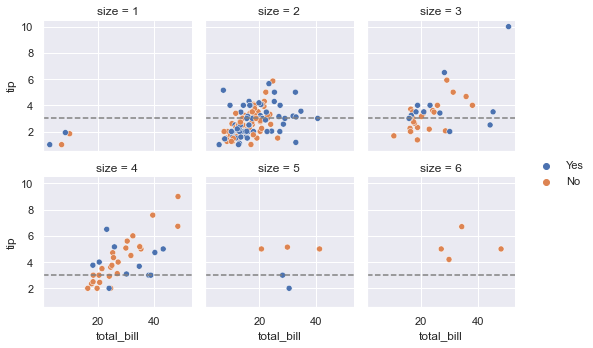

In [212]:
g = sns.FacetGrid(tips,         # Data
                  col="size",   # column based on size
                  height=2.5,   # height of plots
                  col_wrap=3
                  )

g.map(sns.scatterplot,
      "total_bill",
      'tip', 
      'smoker')

g.add_legend()
g.refline(y=tips['tip'].mean())

<a name='customization'></a>
## 6. Customization

Seaborn provides powerful tools to customize the plots using your need. The two main functions for this purpose are
- `set_style()`
- `set_theme()`


<a name='style'></a>
### 6.1 Style and theme


**Style**

Style controls the general style of the plots. There are five predefined styles.

- darkgrid, 
- whitegrid, 
- dark, 
- white, 
- ticks

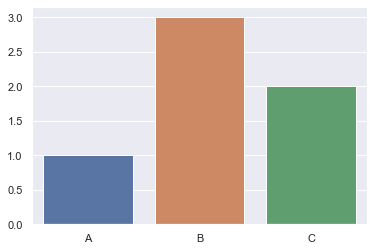

In [213]:
sns.set_style("darkgrid")  # Set the style
ax = sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

<AxesSubplot:>

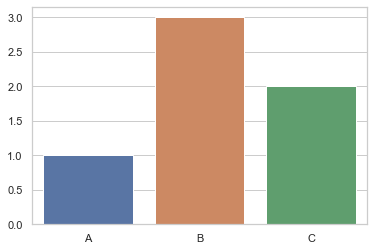

In [214]:
sns.set_style("whitegrid")
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

<AxesSubplot:>

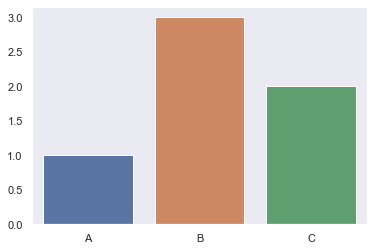

In [215]:
sns.set_style("dark")
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

**Theme**

`set_theme()` sets aspects of visual theme for all matplotlib and seaborn plots.

```Python
seaborn.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)¶
```

As an argument, `set_theme` accept the style as well. 
`context` is scalling parameter and can be used by one of four predefined values,
- paper, 
- notebook, 
- talk, 
- poster

<AxesSubplot:>

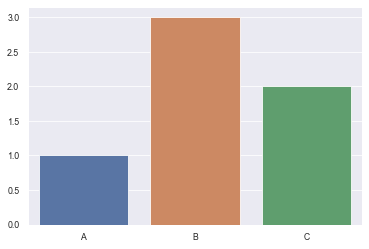

In [216]:
sns.set_theme('paper')
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

<AxesSubplot:>

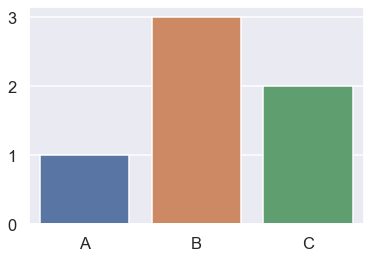

In [217]:
sns.set_theme('talk')
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

<AxesSubplot:>

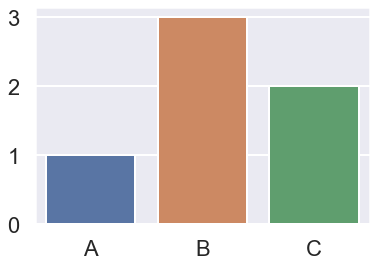

In [218]:
sns.set_theme('poster')
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

We can set the font and style

<AxesSubplot:>

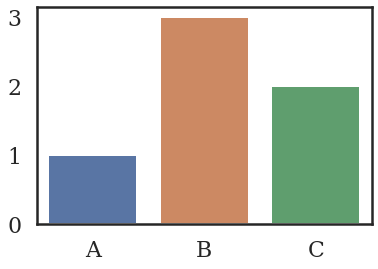

In [219]:
sns.set_theme('poster',
              style='white', # Set style
              font='serif', # set new font
            )

sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

We can also adjust the parameters using `rc`

<AxesSubplot:>

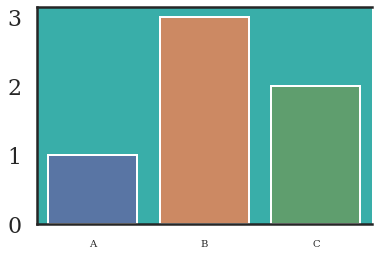

In [220]:
sns.set_theme('poster',
              style='white', # Set style
              font='serif', # set new font
              rc={'axes.spines.right': False, # Desactivating the right axis
                  'xtick.labelsize' : 10, # Change the size of x-labels
                  'axes.facecolor': '#39AEA9' # Change the face color
                  }
            )

sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

<a name='palette'></a>
### 6.2 Colors

With `palette`, we can use a color that is well-suited to our problem. We can use the palettes that exist in Seaborn or create a new one.

### Default palette

You can find a list of palettes [here](https://seaborn.pydata.org/tutorial/color_palettes.html)

<AxesSubplot:xlabel='tip', ylabel='Density'>

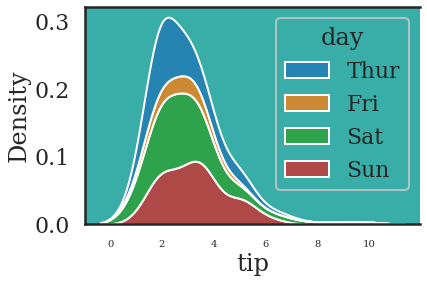

In [221]:
sns.kdeplot(data=tips,
            x='tip',
            hue='day',
            multiple='stack',
            palette='tab10'  # Set the color
            )

<AxesSubplot:xlabel='tip', ylabel='Density'>

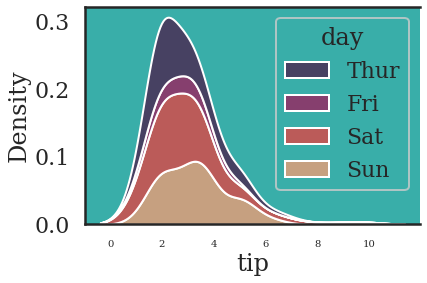

In [222]:
sns.kdeplot(data=tips,
            x='tip',
            hue='day',
            multiple='stack',
            palette='rocket'  # Set the color
            )

<AxesSubplot:xlabel='tip', ylabel='Density'>

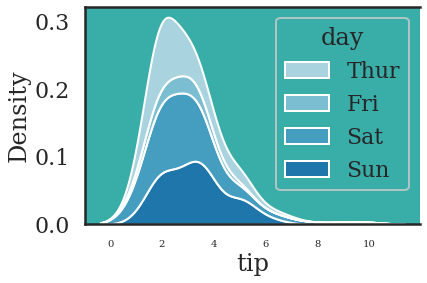

In [223]:
sns.kdeplot(data=tips,
            x='tip',
            hue='day',
            multiple='stack',
            palette='Blues'  # Set the color
            )

References:
    https://seaborn.pydata.org/api.html#distribution-api
### [TOP ☝️](#top)